In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.data_preprocessing.viz_tools import clustering, plot_group_counts, plot_tokens_history

ModuleNotFoundError: No module named 'src'

In [ ]:
df = pd.read_csv("data/ClosePriceData_2022-10-01_to_2022-08-21.csv", index_col=0)
df.drop(columns=["TUSD", "BUSD"], inplace=True)

df.sort_index(inplace=True)

df_change = df/df.iloc[0]-1
df_daily_roi = df.pct_change().dropna()

print("df shape:", df.shape)
df.head()

In [ ]:
plot_tokens_history(data=df_change, title="Initial Tokens", columns=None)

In [ ]:
data = df_daily_roi.T.values.astype(np.float64)

In [3]:
from data_preprocessing.viz_tools import dim_reduction_pca, plot_components

df_red = np.asanyarray(dim_reduction_pca(df=data, var_th=0.90, show_variance=True), dtype=np.float64)

ModuleNotFoundError: No module named 'data_preprocessing'

In [8]:
search_grid = {
    "OPTICS": {"min_samples": [2, 3, 5, 7, 10]},
    "DBSCAN": {"min_samples": [2, 3, 5, 7, 10]}
}
search_grid

{'OPTICS': {'min_samples': [2, 3, 5, 7, 10]},
 'DBSCAN': {'min_samples': [2, 3, 5, 7, 10]}}

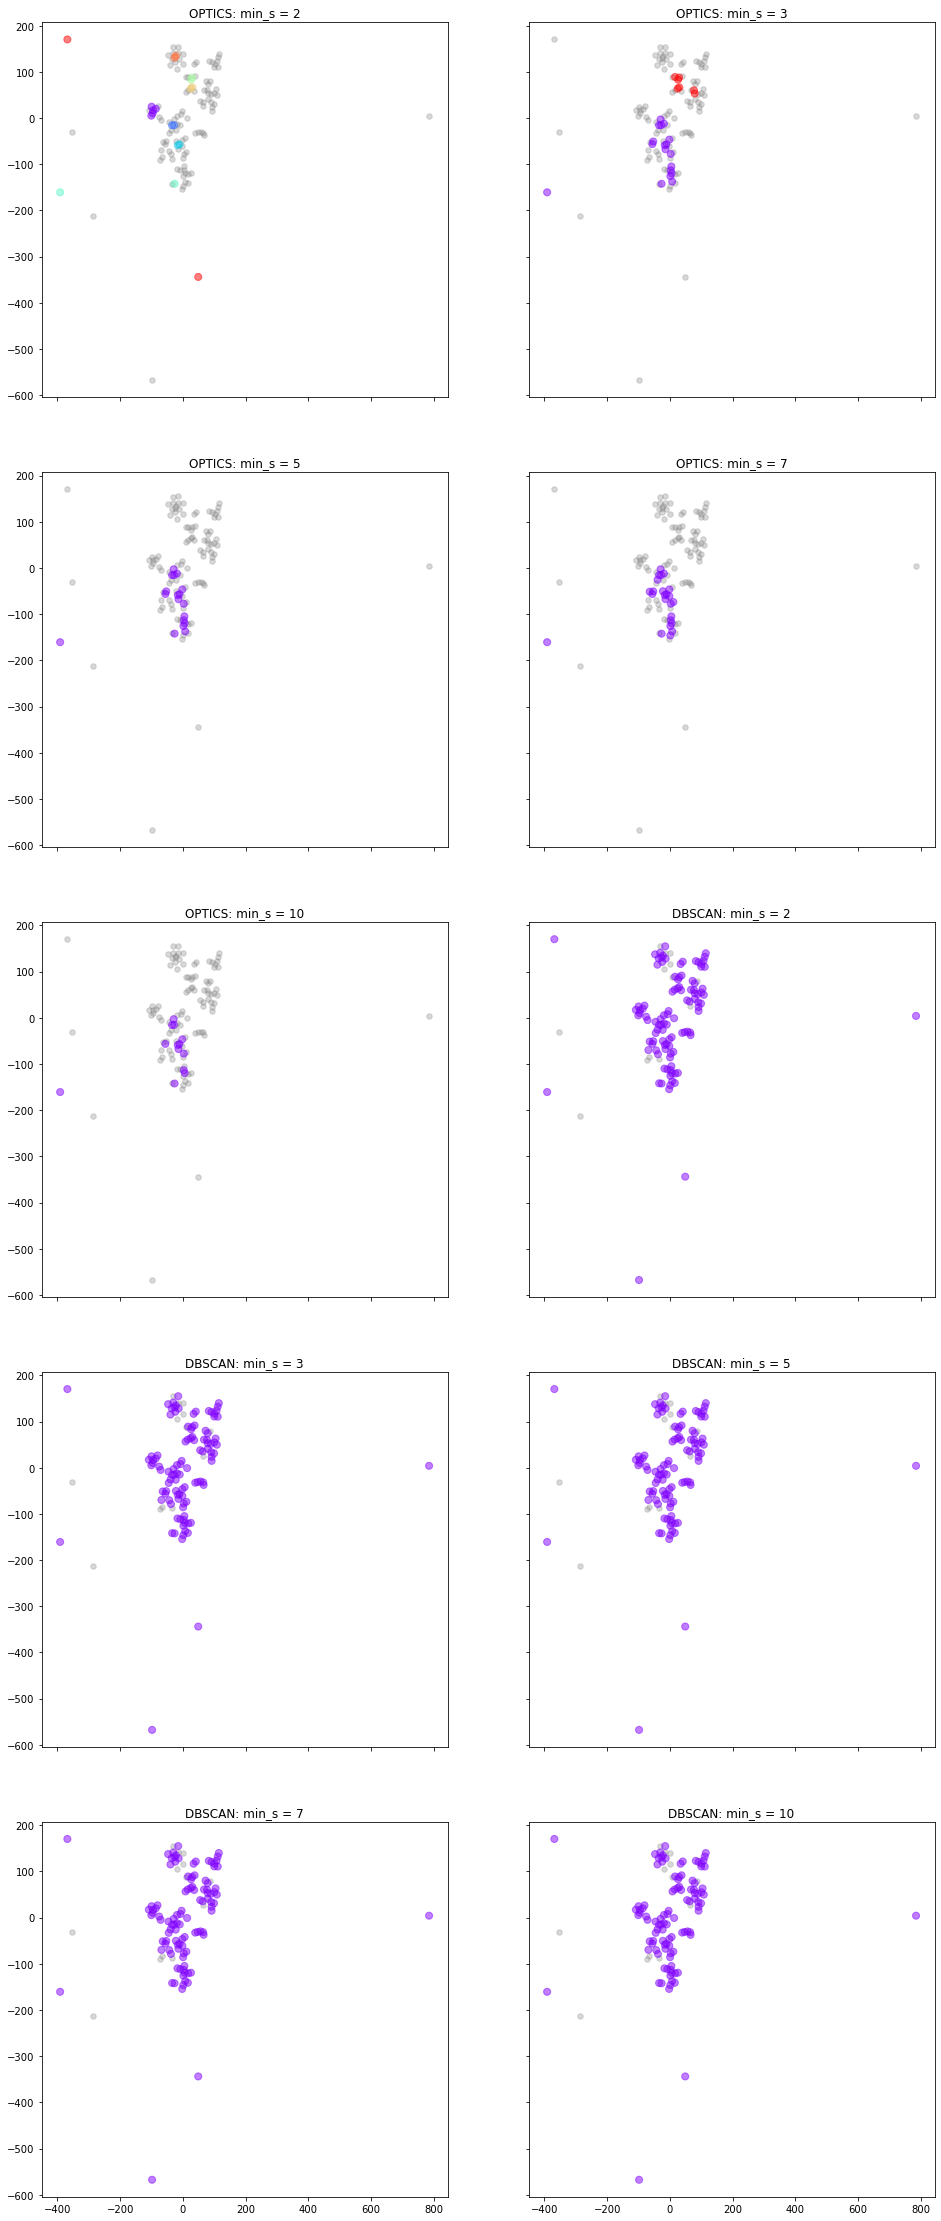

In [9]:
results, tsne_data = clustering(data=df_red, grid=search_grid)
plt.show()

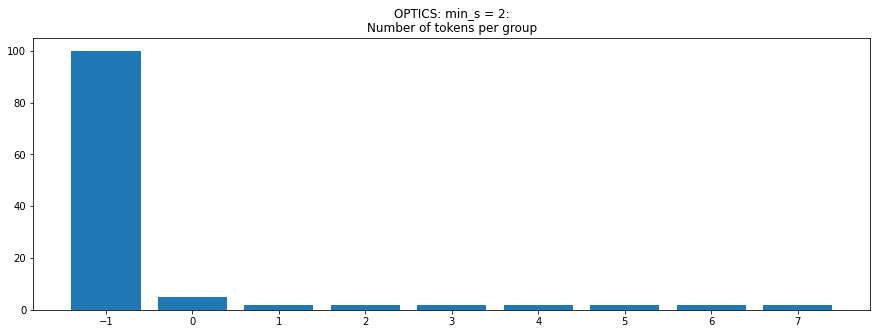

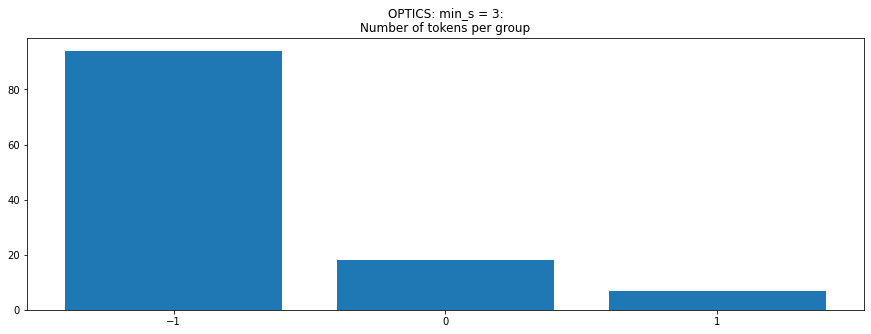

In [10]:
plot_group_counts(results, "OPTICS: min_s = 2")
plot_group_counts(results, "OPTICS: min_s = 3")

In [14]:
tokens_op2 = df.columns[results["OPTICS: min_s = 2"] != -1]
tokens_op3 = df.columns[results["OPTICS: min_s = 3"] != -1]

try:
    tokens_op2.drop("TUSD", inplace=True)
except:
    print("op2 TUSD not in options")
try:
    tokens_op2.drop("BUSD", inplace=True)
except:
    print("op2 BUSD not in options")
    
    
try:
    tokens_op3.drop("TUSD", inplace=True)
except:
    print("op3 TUSD not in options")
try:
    tokens_op3.drop("BUSD", inplace=True)
except:
    print("op3 BUSD not in options")

op2 TUSD not in options
op2 BUSD not in options
op3 TUSD not in options
op3 BUSD not in options


In [1]:
print("Optics MIN2 portfolio len:", len(tokens_op2))
print(tokens_op2)

NameError: name 'tokens_op2' is not defined

In [24]:
print(tokens_op3)

Index(['BAT', 'BNB', 'BTC', 'CAKE', 'DASH', 'ENJ', 'FTT', 'ICX', 'IOST',
       'IOTX', 'LRC', 'MANA', 'NEO', 'OMG', 'ONT', 'QTUM', 'SC', 'UTK', 'VET',
       'XMR', 'XTZ', 'ZEC', 'ZEN', 'ZIL', 'ZRX'],
      dtype='object')

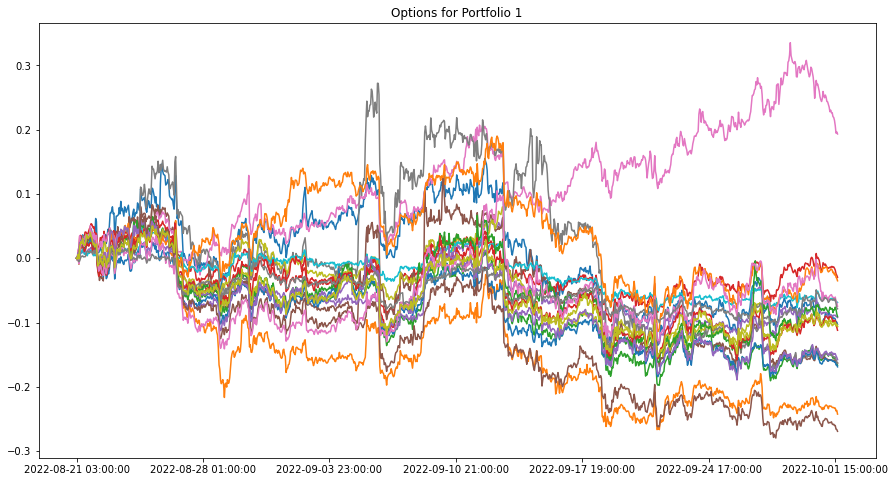

In [19]:
plot_tokens_history(data=df_change, title="Options for Portfolio 1", columns=tokens_op2)

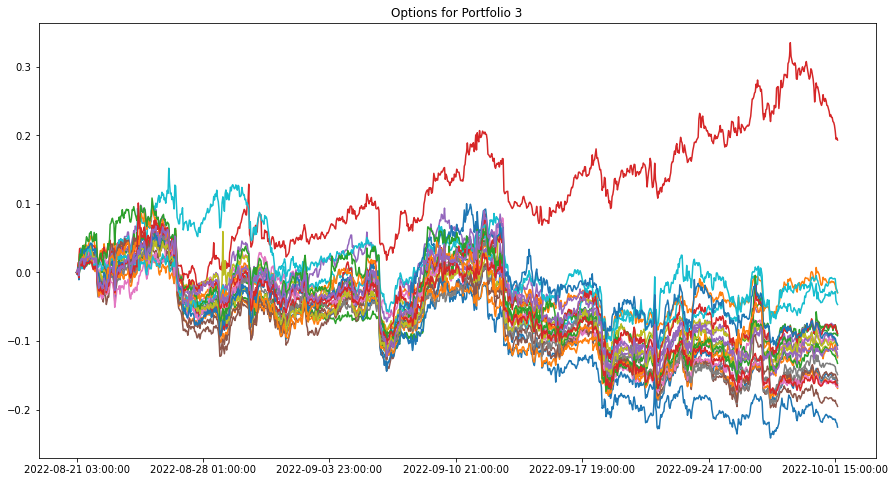

In [20]:
plot_tokens_history(data=df_change, title="Options for Portfolio 3", columns=tokens_op3)

In [31]:
portfolio_options = {
    "Portfolio 1": tokens_op2.tolist(),
    "Portfolio 2": tokens_op3.tolist()
}

In [33]:
import json

with open("portfolios/portfolios.json", "w") as outfile:
    json.dump(portfolio_options, outfile)

In [45]:
df.iloc[-9:]

,AAVE,ADA,ADX,AION,ALGO,AMP,ANC,ANT,ARDR,ATM,...,XLM,XMR,XRP,XTZ,XVG,XZC,ZEC,ZEN,ZIL,ZRX
2022-10-01 10:00:00,75.3,0.4331,0.1707,0.03903,0.3596,0.00507,0.09029,1.690,0.0964,4.68,...,0.1196,150.0,0.4747,1.427,0.00327,4.299,57.0,14.09,0.03123,0.2693
2022-10-01 11:00:00,75.2,0.4326,0.1707,0.03896,0.3616,0.00503,0.09008,1.683,0.0961,4.66,...,0.1192,149.8,0.4737,1.423,0.00326,4.280,56.9,14.04,0.03123,0.2692
2022-10-01 12:00:00,74.8,0.4311,0.1700,0.03893,0.3601,0.00505,0.09010,1.679,0.0956,4.66,...,0.1192,149.7,0.4749,1.419,0.00326,4.200,56.6,14.02,0.03122,0.2684
2022-10-01 13:00:00,74.9,0.4313,0.1712,0.03897,0.3616,0.00515,0.09045,1.681,0.0960,4.66,...,0.1199,149.7,0.4810,1.421,0.00327,4.262,56.5,14.03,0.03126,0.2689
2022-10-01 14:00:00,74.9,0.4314,0.1709,0.03897,0.3600,0.00506,0.09051,1.677,0.0956,4.65,...,0.1201,149.8,0.4767,1.416,0.00329,4.315,56.6,13.99,0.03123,0.2692
2022-10-01 15:00:00,74.8,0.4317,0.1705,0.03864,0.3616,0.00501,0.09080,1.678,0.0959,4.66,...,0.1215,149.7,0.4821,1.417,0.00328,4.289,56.9,14.00,0.03132,0.2700
2022-10-01 16:00:00,74.3,0.4297,0.1697,0.03866,0.3583,0.00496,0.09050,1.667,0.0953,4.62,...,0.1204,147.8,0.4814,1.408,0.00327,4.348,56.4,13.92,0.03112,0.2679
2022-10-01 17:00:00,74.4,0.4300,0.1708,0.03852,0.3555,0.00496,0.09062,1.663,0.0955,4.63,...,0.1199,147.3,0.4741,1.405,0.00327,4.373,56.1,13.89,0.03112,0.2680
2022-10-01 18:00:00,74.1,0.4289,0.1705,0.03852,0.3545,0.00495,0.09039,1.658,0.0954,4.62,...,0.1197,146.7,0.4736,1.401,0.00326,4.446,55.7,13.82,0.03109,0.2661
